# **Leer data transformadores**

In [2]:
import pandas as pd

# Lee el archivo CSV
df_transformadores = pd.read_csv('df_rellenado_con_nans.csv')

# Muestra las primeras filas del DataFrame
df_transformadores.head()

,Fecha y hora,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW),SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr),SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW),SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr),SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW),...,SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW),SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr),SE_Calera.Trf_Calera_T2 Potencia activa media (kW),SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr),estacion,estacion_2
0,2021-01-01 00:30:00,6657.061100,392.181486,9087.688446,-89.524969,9393.958092,1439.777136,8747.844727,-132.386734,4363.275051,...,8986.115234,1787.867920,14563.25817,1948.054075,8607.710838,1346.077800,7858.459949,467.431158,verano,verano
1,2021-01-01 00:45:00,6600.084782,370.762348,9007.225990,-48.079155,9353.917122,1430.533409,8626.563477,-140.524490,4372.547626,...,8946.944336,1806.897827,14303.06339,2033.608913,8421.904564,1292.887449,7973.084927,486.736864,verano,verano
2,2021-01-01 01:00:00,6579.427719,385.641813,8908.111572,-71.154483,9084.967613,1380.251646,8546.049805,-164.159393,4297.423363,...,8749.440430,1736.990967,14161.10229,2011.147261,8396.206856,1296.282291,7781.050682,708.620131,verano,verano
3,2021-01-01 01:15:00,6523.938179,389.757663,8725.055695,-123.746052,8897.534370,1328.508615,8458.301758,-164.846237,4189.702034,...,8650.058594,1721.460083,14255.73540,2104.893208,8420.323372,1306.474209,7601.181507,1331.551671,verano,verano
4,2021-01-01 01:30:00,6389.933586,364.311010,8571.299553,-159.668446,8714.198112,1283.114433,8302.192383,-205.847855,4165.856361,...,8527.763672,1702.901367,13911.45802,1989.736915,8410.838127,1365.293384,7718.300819,1400.925994,verano,verano


In [3]:
df_transformadores['estacion_2'].unique()

array(['verano', 'invierno'], dtype=object)

In [4]:
columnas = [
    'Fecha y hora',
    "SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW)",
    "SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr)",
    "SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW)",
    "SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr)",
    "SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)",
    "SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)",
    "SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW)",
    "SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr)",
    "SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)",
    "SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr)",
    'estacion',
    'estacion_2'
]

df_transformadores = df_transformadores[columnas]

df_transformadores['Fecha y hora'] = pd.to_datetime(df_transformadores['Fecha y hora'])


In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import os

transformador_columnas_p = [
 "SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW)",
 "SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW)",
 "SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)",
 "SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW)", 
 "SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)"
]
    

transformador_columnas_q = [
 "SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr)",
]

In [6]:
# Unir ambas listas de columnas
columnas_a_convertir = transformador_columnas_p + transformador_columnas_q

# Aplicar la conversión: dividir por 1000
df_transformadores[columnas_a_convertir] = df_transformadores[columnas_a_convertir] / 1000

In [7]:
df_transformadores.head()

,Fecha y hora,SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW),SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr),SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW),SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr),SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW),SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr),estacion,estacion_2
0,2021-01-01 00:30:00,12.940086,3.649591,8.986115,1.787868,14.563258,1.948054,8.607711,1.346078,4.363275,0.705140,verano,verano
1,2021-01-01 00:45:00,12.640568,3.558793,8.946944,1.806898,14.303063,2.033609,8.421905,1.292887,4.372548,0.669971,verano,verano
2,2021-01-01 01:00:00,12.424030,3.533698,8.749440,1.736991,14.161102,2.011147,8.396207,1.296282,4.297423,0.676845,verano,verano
3,2021-01-01 01:15:00,12.373395,3.551495,8.650059,1.721460,14.255735,2.104893,8.420323,1.306474,4.189702,0.644257,verano,verano
4,2021-01-01 01:30:00,12.171638,3.438511,8.527764,1.702901,13.911458,1.989737,8.410838,1.365293,4.165856,0.633751,verano,verano


In [8]:
df_transformadores['Fecha y hora'] = pd.to_datetime(df_transformadores['Fecha y hora'])

# Mostrar la fecha mínima y máxima
fecha_min = df_transformadores['Fecha y hora'].min()
fecha_max = df_transformadores['Fecha y hora'].max()

print("Fecha mínima:", fecha_min)
print("Fecha máxima:", fecha_max)


Fecha mínima: 2021-01-01 00:30:00
Fecha máxima: 2025-04-21 00:00:00


In [9]:
# Definir las fechas de inicio y fin
fecha_inicio = pd.to_datetime('2022-09-01 00:00:00')
fecha_fin = pd.to_datetime('2025-04-08 00:00:00')

# Filtrar el DataFrame para que solo contenga registros entre fecha_inicio y fecha_fin
df_transformadores = df_transformadores[(df_transformadores['Fecha y hora'] >= fecha_inicio) & (df_transformadores['Fecha y hora'] <= fecha_fin)]

In [10]:
df_transformadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91201 entries, 58366 to 149566
Data columns (total 13 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Fecha y hora                                                    91201 non-null  datetime64[ns]
 1   SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW)      91201 non-null  float64       
 2   SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr)  91201 non-null  float64       
 3   SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW)      91201 non-null  float64       
 4   SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr)  91201 non-null  float64       
 5   SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)      91201 non-null  float64       
 6   SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)  91201 non-null  float6

# **Instalación de librerias**

In [12]:
!pip install prophet

In [13]:
from prophet import Prophet
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Modelos Invierten Q**

In [15]:
def calcular_mape(y_true, y_pred, min_denominador=1.0):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true >= min_denominador
    if np.any(mask):
        return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    else:
        return np.nan

## Estacionalidades automaticas 3 años de data

In [17]:
def ejecutar_modelo_prophet_parametros_estacion(df, columna, fecha_inicio_test):
    # Preparar datos
    df_prophet = df[['Fecha y hora', columna, 'estacion']].dropna().rename(columns={
        'Fecha y hora': 'ds',
        columna: 'y'
    })
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    # Convertir 'estacion' en dummies
    df_prophet = pd.get_dummies(df_prophet, columns=['estacion'], prefix='est')
    columnas_estacion = [col for col in df_prophet.columns if col.startswith('est_')]

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    fecha_inicio_train_eval = fecha_inicio_test - pd.Timedelta(weeks=4)
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)

    # Filtrar conjuntos
    df_test = df_prophet[(df_prophet['ds'] >= fecha_inicio_test) & (df_prophet['ds'] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet['ds'] >= fecha_inicio_train_eval) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[df_prophet['ds'] <= fecha_fin_train_eval].copy()

    # Inicializar modelo Prophet con valores por defecto
    m = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True,
        uncertainty_samples=0
    )

    # Añadir regresores de estación
    for col in columnas_estacion:
        m.add_regressor(col)

    # Entrenar
    m.fit(df_train)

    # Preparar fechas futuras con regresores
    future = pd.concat([df_train_eval[['ds']], df_test[['ds']]]).drop_duplicates().sort_values('ds')
    future = future.merge(df_prophet[['ds'] + columnas_estacion], on='ds', how='left')

    # Predecir
    forecast = m.predict(future)

    # Evaluación
    forecast_train_eval = forecast[forecast['ds'].isin(df_train_eval['ds'])]
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    df_train_eval = df_train_eval.set_index('ds').join(forecast_train_eval.set_index('ds')[['yhat']], how='inner')
    df_test_eval = df_test.set_index('ds').join(forecast_test.set_index('ds')[['yhat']], how='inner')

    # Métricas
    mae_train = mean_absolute_error(df_train_eval['y'], df_train_eval['yhat'])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval['y'], df_train_eval['yhat']))
    mape_train = calcular_mape(df_train_eval['y'], df_train_eval['yhat'])

    mae_test = mean_absolute_error(df_test_eval['y'], df_test_eval['yhat'])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval['y'], df_test_eval['yhat']))
    mape_test = calcular_mape(df_test_eval['y'], df_test_eval['yhat'])

    # Gráfico
    plt.figure(figsize=(12, 4))
    plt.plot(df_test_eval.index, df_test_eval['y'], label='Real')
    plt.plot(df_test_eval.index, df_test_eval['yhat'], label='Predicción')
    plt.title(f'Predicción vs Real – {columna} [{fecha_inicio_test.date()}]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Reporte
    print(f"Test desde: {fecha_inicio_test.date()}")
    print(" TRAIN EVAL (semana -4 a -3):")
    print(f"  MAE:  {mae_train:.3f} | RMSE: {rmse_train:.3f} | MAPE: {mape_train:.2f}%")
    print(" TEST (semana actual):")
    print(f"  MAE:  {mae_test:.3f} | RMSE: {rmse_test:.3f} | MAPE: {mape_test:.2f}%")

    return {
        'fecha_inicio_test': fecha_inicio_test,
        'MAE_train': mae_train, 'RMSE_train': rmse_train, 'MAPE_train': mape_train,
        'MAE_test': mae_test,   'RMSE_test': rmse_test,   'MAPE_test': mape_test
    }


 Evaluando Q para 2025-03-17


13:46:53 - cmdstanpy - INFO - Chain [1] start processing
13:47:06 - cmdstanpy - INFO - Chain [1] done processing


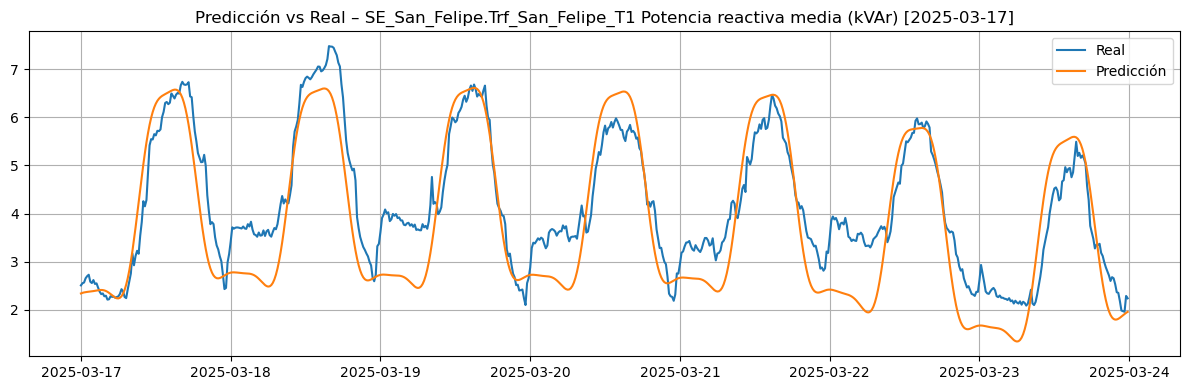

Test desde: 2025-03-17
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.546 | RMSE: 0.676 | MAPE: 11.64%
 TEST (semana actual):
  MAE:  0.641 | RMSE: 0.753 | MAPE: 17.25%

 Evaluando Q para 2025-01-13


13:47:07 - cmdstanpy - INFO - Chain [1] start processing
13:47:21 - cmdstanpy - INFO - Chain [1] done processing


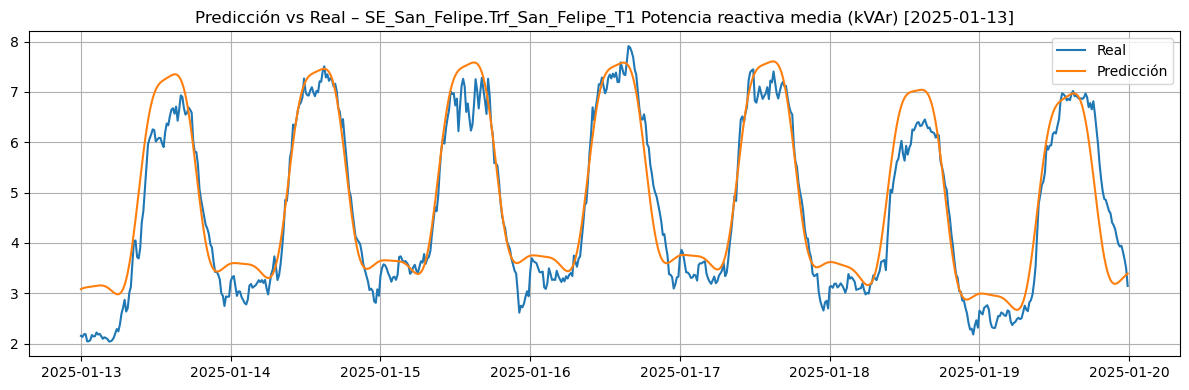

Test desde: 2025-01-13
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.762 | RMSE: 0.856 | MAPE: 19.56%
 TEST (semana actual):
  MAE:  0.411 | RMSE: 0.524 | MAPE: 10.57%

 Evaluando Q para 2024-10-21


13:47:22 - cmdstanpy - INFO - Chain [1] start processing
13:47:32 - cmdstanpy - INFO - Chain [1] done processing


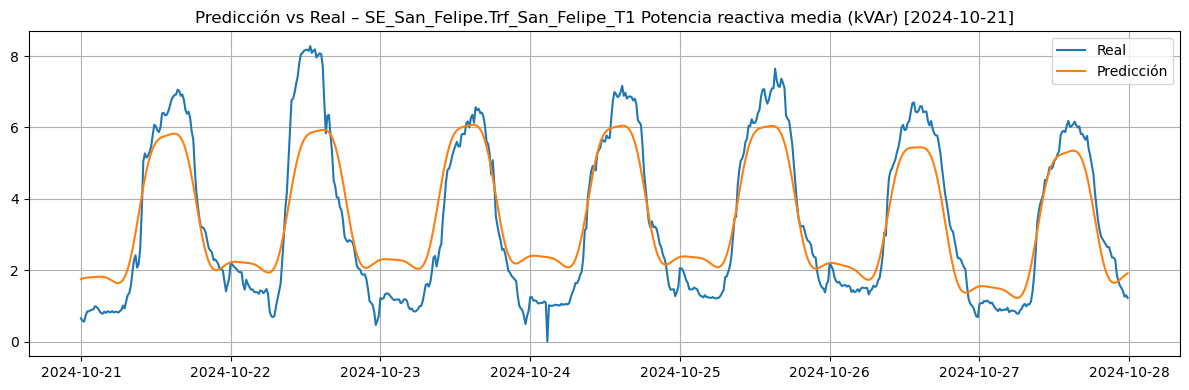

Test desde: 2024-10-21
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.476 | RMSE: 0.626 | MAPE: 24.96%
 TEST (semana actual):
  MAE:  0.748 | RMSE: 0.885 | MAPE: 29.93%

 Evaluando Q para 2024-07-10


13:47:33 - cmdstanpy - INFO - Chain [1] start processing
13:47:50 - cmdstanpy - INFO - Chain [1] done processing


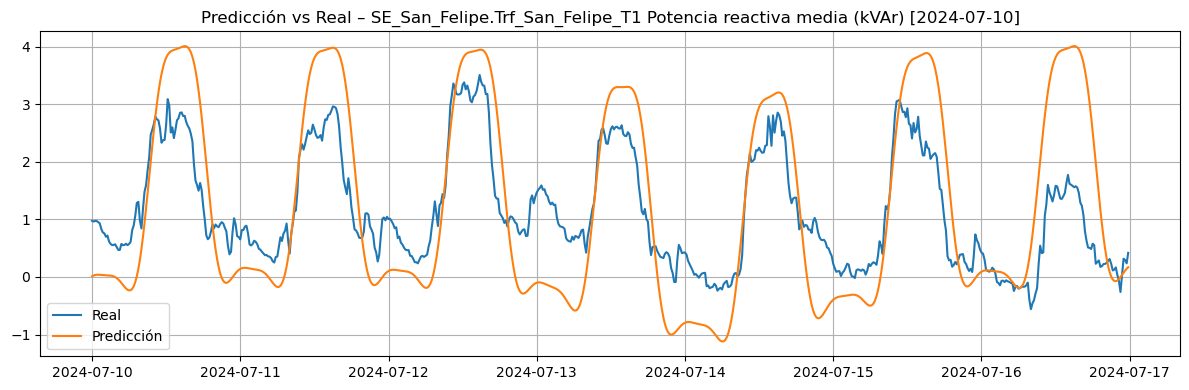

Test desde: 2024-07-10
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.927 | RMSE: 1.216 | MAPE: 54.93%
 TEST (semana actual):
  MAE:  0.843 | RMSE: 1.017 | MAPE: 60.17%

 Resultados Potencia Reactiva (Q):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.546274    0.675801   11.636562  0.641392   0.752728   
1        2025-01-13   0.761813    0.855792   19.558675  0.410761   0.524366   
2        2024-10-21   0.475982    0.625847   24.955621  0.748461   0.885129   
3        2024-07-10   0.927447    1.216110   54.931673  0.842547   1.017120   

   MAPE_test variable  
0  17.248124        Q  
1  10.571452        Q  
2  29.931566        Q  
3  60.170250        Q  


In [18]:
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

columna_q = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)'

resultados_q = []

for fecha in fechas_test:
    print(f"\n Evaluando Q para {fecha}")
    resultado_q = ejecutar_modelo_prophet_parametros_estacion(df_transformadores, columna_q, fecha)
    resultado_q['fecha_inicio_test'] = fecha
    resultado_q['variable'] = 'Q'
    resultados_q.append(resultado_q)

df_resultados_q = pd.DataFrame(resultados_q)

print("\n Resultados Potencia Reactiva (Q):")
print(df_resultados_q)


## Estacionalidades manuales 3 años de data

In [20]:
def ejecutar_modelo_prophet_parametros_estacion_manual(df, columna, fecha_inicio_test):
    # Preparar datos
    df_prophet = df[['Fecha y hora', columna, 'estacion']].dropna().rename(columns={
        'Fecha y hora': 'ds',
        columna: 'y'
    })
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

    # Convertir 'estacion' en dummies
    df_prophet = pd.get_dummies(df_prophet, columns=['estacion'], prefix='est')
    columnas_estacion = [col for col in df_prophet.columns if col.startswith('est_')]

    # Fechas clave
    fecha_inicio_test = pd.to_datetime(fecha_inicio_test)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    fecha_inicio_train_eval = fecha_inicio_test - pd.Timedelta(weeks=4)
    fecha_fin_train_eval = fecha_inicio_test - pd.Timedelta(weeks=3)

    # Filtrar conjuntos
    df_test = df_prophet[(df_prophet['ds'] >= fecha_inicio_test) & (df_prophet['ds'] < fecha_fin_test)].copy()
    df_train_eval = df_prophet[(df_prophet['ds'] >= fecha_inicio_train_eval) & (df_prophet['ds'] < fecha_fin_train_eval)].copy()
    df_train = df_prophet[df_prophet['ds'] <= fecha_fin_train_eval].copy()

    # Crear y configurar el modelo
    m = Prophet(
        daily_seasonality=False,
        weekly_seasonality=False,
        yearly_seasonality=False,
        n_changepoints=50
    )
    m.add_seasonality(name='daily_hour', period=1, fourier_order=20)
    m.add_seasonality(name='weekly_custom', period=7, fourier_order=30)
    m.add_seasonality(name='yearly_custom', period=365.25, fourier_order=10)

    # Añadir regresores de estación
    for col in columnas_estacion:
        m.add_regressor(col)

    # Entrenar
    m.fit(df_train)

    # Preparar fechas futuras con regresores
    future = pd.concat([df_train_eval[['ds']], df_test[['ds']]]).drop_duplicates().sort_values('ds')
    future = future.merge(df_prophet[['ds'] + columnas_estacion], on='ds', how='left')

    # Predecir
    forecast = m.predict(future)

    # Evaluación
    forecast_train_eval = forecast[forecast['ds'].isin(df_train_eval['ds'])]
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    df_train_eval = df_train_eval.set_index('ds').join(forecast_train_eval.set_index('ds')[['yhat']], how='inner')
    df_test_eval = df_test.set_index('ds').join(forecast_test.set_index('ds')[['yhat']], how='inner')

    # Métricas
    mae_train = mean_absolute_error(df_train_eval['y'], df_train_eval['yhat'])
    rmse_train = np.sqrt(mean_squared_error(df_train_eval['y'], df_train_eval['yhat']))
    mape_train = calcular_mape(df_train_eval['y'], df_train_eval['yhat'])

    mae_test = mean_absolute_error(df_test_eval['y'], df_test_eval['yhat'])
    rmse_test = np.sqrt(mean_squared_error(df_test_eval['y'], df_test_eval['yhat']))
    mape_test = calcular_mape(df_test_eval['y'], df_test_eval['yhat'])

    # Gráfico
    plt.figure(figsize=(12, 4))
    plt.plot(df_test_eval.index, df_test_eval['y'], label='Real')
    plt.plot(df_test_eval.index, df_test_eval['yhat'], label='Predicción')
    plt.title(f'Predicción vs Real – {columna} [{fecha_inicio_test.date()}]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Reporte
    print(f"Test desde: {fecha_inicio_test.date()}")
    print(" TRAIN EVAL (semana -4 a -3):")
    print(f"  MAE:  {mae_train:.3f} | RMSE: {rmse_train:.3f} | MAPE: {mape_train:.2f}%")
    print(" TEST (semana actual):")
    print(f"  MAE:  {mae_test:.3f} | RMSE: {rmse_test:.3f} | MAPE: {mape_test:.2f}%")

    return {
        'fecha_inicio_test': fecha_inicio_test,
        'MAE_train': mae_train, 'RMSE_train': rmse_train, 'MAPE_train': mape_train,
        'MAE_test': mae_test,   'RMSE_test': rmse_test,   'MAPE_test': mape_test
    }




 Evaluando Q para 2025-03-17


13:47:54 - cmdstanpy - INFO - Chain [1] start processing
13:49:26 - cmdstanpy - INFO - Chain [1] done processing


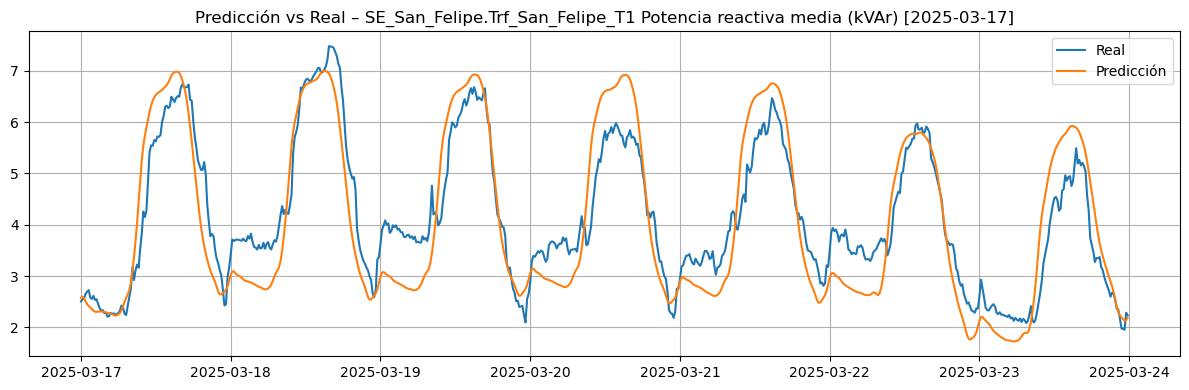

Test desde: 2025-03-17
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.493 | RMSE: 0.615 | MAPE: 10.34%
 TEST (semana actual):
  MAE:  0.569 | RMSE: 0.670 | MAPE: 14.46%

 Evaluando Q para 2025-01-13


13:49:29 - cmdstanpy - INFO - Chain [1] start processing
13:50:57 - cmdstanpy - INFO - Chain [1] done processing


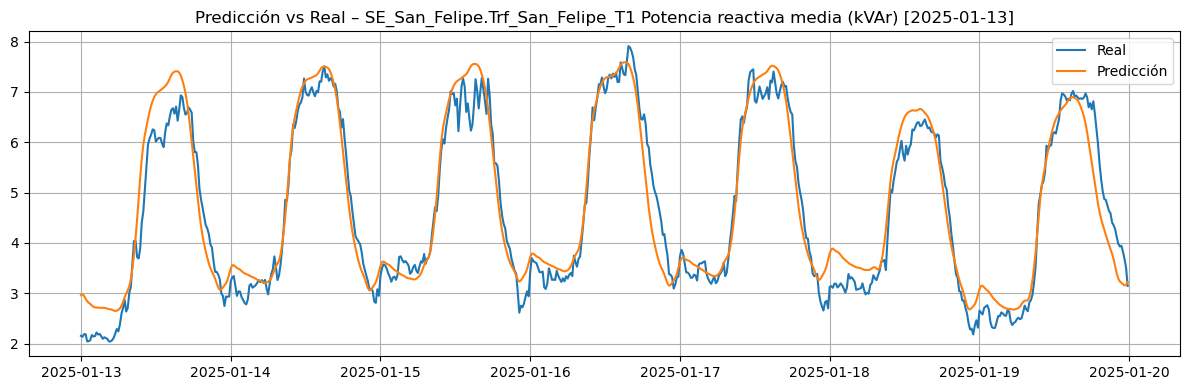

Test desde: 2025-01-13
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.759 | RMSE: 0.850 | MAPE: 18.94%
 TEST (semana actual):
  MAE:  0.352 | RMSE: 0.446 | MAPE: 8.65%

 Evaluando Q para 2024-10-21


13:51:00 - cmdstanpy - INFO - Chain [1] start processing
13:51:49 - cmdstanpy - INFO - Chain [1] done processing


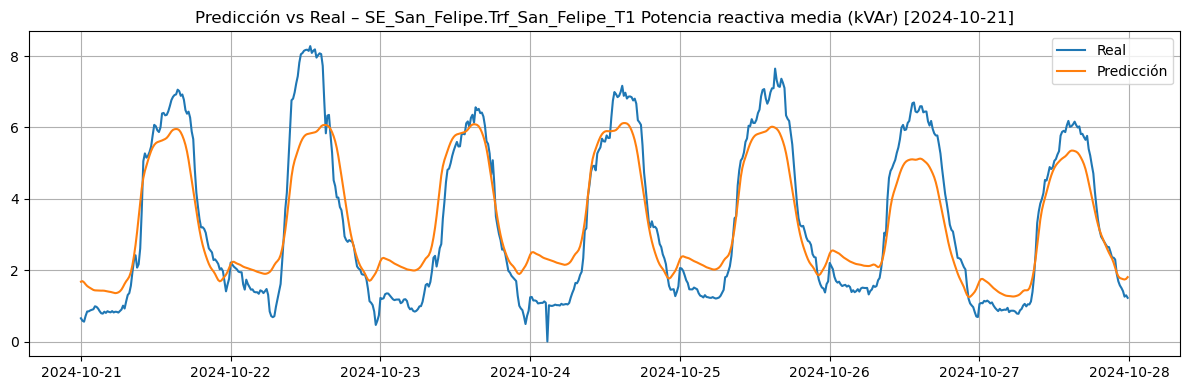

Test desde: 2024-10-21
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.468 | RMSE: 0.621 | MAPE: 24.00%
 TEST (semana actual):
  MAE:  0.727 | RMSE: 0.866 | MAPE: 28.53%

 Evaluando Q para 2024-07-10


13:51:52 - cmdstanpy - INFO - Chain [1] start processing
13:52:48 - cmdstanpy - INFO - Chain [1] done processing


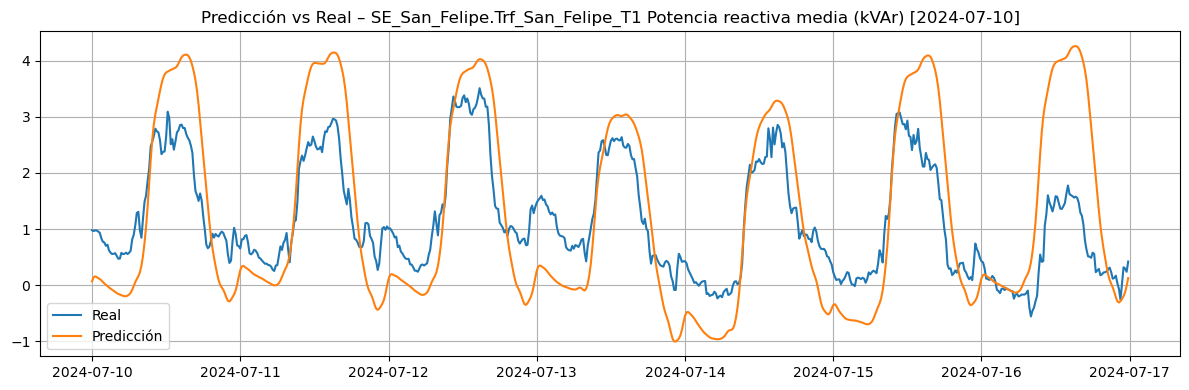

Test desde: 2024-07-10
 TRAIN EVAL (semana -4 a -3):
  MAE:  0.918 | RMSE: 1.201 | MAPE: 50.45%
 TEST (semana actual):
  MAE:  0.833 | RMSE: 1.018 | MAPE: 60.86%

 Resultados Potencia Reactiva (Q):
  fecha_inicio_test  MAE_train  RMSE_train  MAPE_train  MAE_test  RMSE_test  \
0        2025-03-17   0.492779    0.615417   10.342009  0.569194   0.670029   
1        2025-01-13   0.759241    0.849604   18.937496  0.351683   0.446363   
2        2024-10-21   0.467861    0.621430   24.002865  0.726969   0.866251   
3        2024-07-10   0.918194    1.201448   50.448564  0.833207   1.017910   

   MAPE_test variable  
0  14.463879        Q  
1   8.650129        Q  
2  28.533612        Q  
3  60.863850        Q  


In [21]:
fechas_test = ['2025-03-17', '2025-01-13', '2024-10-21', '2024-07-10']

columna_q = 'SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)'

resultados_q = []

for fecha in fechas_test:
    print(f"\n Evaluando Q para {fecha}")
    resultado_q = ejecutar_modelo_prophet_parametros_estacion_manual(df_transformadores, columna_q, fecha)
    resultado_q['fecha_inicio_test'] = fecha
    resultado_q['variable'] = 'Q'
    resultados_q.append(resultado_q)

df_resultados_q = pd.DataFrame(resultados_q)

print("\n Resultados Potencia Reactiva (Q):")
print(df_resultados_q)
